# Zajęcia 4 - klasyfikacja

Klasyfikacja to zagadnienie polegające na przypisaniu do danych konkretnej klasy na podstawie wartości atrybutów opisujących dany obiekt.

Na tych zajęciach skupimy się na wykorzystaniu części z metod klasyfikacji danych, które udostępnia biblioteka scikit-learn (sklearn).

## Przygotowanie danych 

Na potrzeby nauki podstawowych metod klasyfikacji wykorzystamy zbiór zawierający informacje na temat kręgowców. Dane są cechy: ciepłokrwisty, żyworodny, stworzenie wodne, stworzenie powietrzne, ma nogi, hibernuje i klasa, określająca, czy stworzenie jest rybą, płazem, gadem, ptakim czy ssakiem. Cechy mają wartości 0/1, tak więc można traktować je jako wartości logiczne False/True. Pozostawimy je natomiast w formie numerycznej na potrzeby dalszych operacji.

In [1]:
import pandas as pd

data = pd.read_csv('./Dane/vertebrate.csv')
data

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,reptiles
2,salmon,0,0,1,0,0,0,fishes
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,amphibians
5,komodo,0,0,0,0,1,0,reptiles
6,bat,1,1,0,1,1,1,mammals
7,pigeon,1,0,0,1,1,0,birds
8,cat,1,1,0,0,1,0,mammals
9,leopard shark,0,1,1,0,0,0,fishes


Postawmy problem dzisiejszych zajęć w postaci - jak rozpoznać, czy zwierzę jest ssakiem, czy ssakiem nie jest?

Dla tak sformułowanego problemu, zdecydowanie łatwiej będzie nam operować na innych etykietach klas - wszystkie ssaki pozostawmy oznaczone jako "mammals", a wszędzie, gdzie mamy do czynienia z inną gromadą - ustawmy etykietę "non-mammals"

In [3]:
data['Class'] = data['Class'].replace(['fishes','birds','amphibians','reptiles'],'non-mammals')
data

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,non-mammals
2,salmon,0,0,1,0,0,0,non-mammals
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,non-mammals
5,komodo,0,0,0,0,1,0,non-mammals
6,bat,1,1,0,1,1,1,mammals
7,pigeon,1,0,0,1,1,0,non-mammals
8,cat,1,1,0,0,1,0,mammals
9,leopard shark,0,1,1,0,0,0,non-mammals


Na tym etapie wykorzystać można krostabulację wbudowaną w bibliotekę pandas, która pokaże nam ilościowe połączenie cech ze sobą. Możemy na przykład ocenić jak wygląda relacja pomiędzy ciepłokrwistością (kolumna Warm-blooded) a żyworodnością (kolumna Gives Birth)

In [4]:
pd.crosstab([data['Warm-blooded'], data['Gives Birth']], data['Class'])

Class                     mammals  non-mammals
Warm-blooded Gives Birth                      
0            0                  0            7
             1                  0            1
1            0                  0            2
             1                  5            0

## Drzewa decyzyjne

Idąc tym tropem - można by było przeprowadzić analizę korelacji wszystkich cech ze sobą i na ich podstawie ocenić, które cechy definiują ssaki, a które nie-ssaki. 

Jednak naszym zadaniem jest automatyzacja tego procesu.

Pierwsze podejście, jakie zastosujemy to drzewa decyzyjne. Skorzystamy z gotowej implementacji konstrukcji drzewa decyzyjnego z pakietu sklearn.

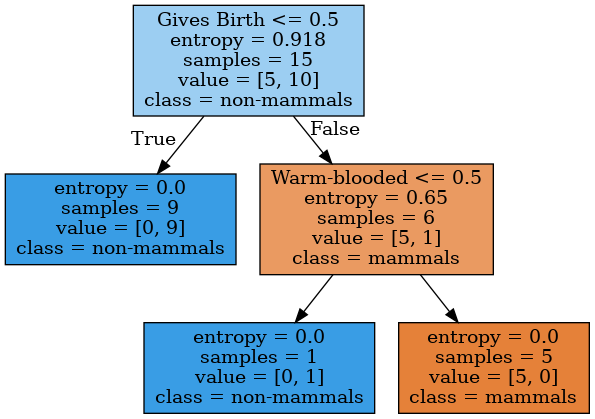

In [10]:
from sklearn import tree

Y = data['Class']
X = data.drop(['Name','Class'],axis=1)

clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)
clf = clf.fit(X, Y)

import pydotplus 
from IPython.display import Image

dot_data = tree.export_graphviz(clf, feature_names=X.columns, class_names=['mammals','non-mammals'], filled=True, 
                                out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

Zbudujmy teraz zbiór testowy - w bardzo syntetyczny sposób i sprawdźmy, czy na podstawie nauczenia drzewa decyzyjnego, jesteśmy w stanie sklasyfikować zwierzęta do odpowiedniej klasy.

In [12]:
testData = [['gila monster',0,0,0,0,1,1,'non-mammals'],
           ['platypus',1,0,0,0,1,1,'mammals'],
           ['owl',1,0,0,1,1,0,'non-mammals'],
           ['dolphin',1,1,1,0,0,0,'mammals']]
testData = pd.DataFrame(testData, columns=data.columns)
testData

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,gila monster,0,0,0,0,1,1,non-mammals
1,platypus,1,0,0,0,1,1,mammals
2,owl,1,0,0,1,1,0,non-mammals
3,dolphin,1,1,1,0,0,0,mammals


In [19]:
testX = testData.drop(['Name','Class'],axis=1)
testY = testData['Class']

predY = clf.predict(testX)
predictions = pd.concat([testData['Name'],pd.Series(predY,name='Przewidywana klasa')], axis=1)
predictions

,Name,Przewidywana klasa
0,gila monster,non-mammals
1,platypus,non-mammals
2,owl,non-mammals
3,dolphin,mammals


In [20]:
from sklearn.metrics import accuracy_score

print('Skuteczność przewidywania to %.2f' % (accuracy_score(testY, predY)))

Skuteczność przewidywania to 0.75


### Problem przeszacowania modelu z wykorzystaniem drzew decyzyjnych

Aby zilustrować ten problem stworzymy sytentyczny zbiór danych, który składać się będzie z 1500 instancji etykietowanych jako 0 i 1.

Zasada budowy klas jest następująca:

0. rozkład równomierny w określonym przedziale parametrów X i Y, gdzie $X,Y \in [0, 20]$.
1. suma trzech rozkładów Gaussa zlokalizowanych odpowiednio wokół par punktów $(X,Y)$:  $(6, 14)$, $(10, 6)$ i $(14,14)$

Na sam początek - wygenerowanie danych i ich ilustracja graficzna. Oczywiście w wyniku będziemy mieli pomieszane dane o różnych klasach, generowane dwiema metodami.

Text(0, 0.5, 'Y')

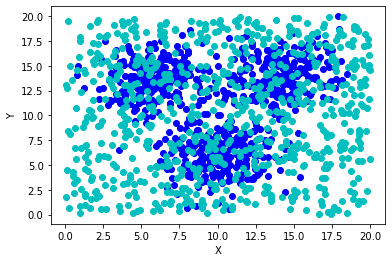

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import random

%matplotlib inline

N = 1500

mean1 = [6, 14]
mean2 = [10, 6]
mean3 = [14, 14]
cov = [[3.5, 0], [0, 3.5]]

np.random.seed(50)
X = np.random.multivariate_normal(mean1, cov, int(N/6))
X = np.concatenate((X, np.random.multivariate_normal(mean2, cov, int(N/6))))
X = np.concatenate((X, np.random.multivariate_normal(mean3, cov, int(N/6))))
X = np.concatenate((X, 20*np.random.rand(int(N/2),2)))
Y = np.concatenate((np.ones(int(N/2)),np.zeros(int(N/2))))

plt.plot(X[:int(N/2),0],X[:int(N/2),1],'bo',X[int(N/2):,0],X[int(N/2):,1],'co')
plt.xlabel('X')
plt.ylabel('Y')

Następnie podzielmy wygenerowany zbiór danych na zbiór treningowy i testowy. Weźmy 80% danych jako zbiór treningowy i 20% jako zbiór testowy. Następnie zbudujmy na podstawie zbioru treningowego drzewa decyzyjne o określonej przez nas liczbie zagłębień (lista maxdepths).

Text(0, 0.5, 'Precyzja')

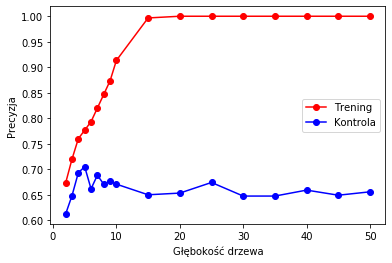

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8, random_state=1)

from sklearn import tree
from sklearn.metrics import accuracy_score

maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]

trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    index += 1
        
plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bo-')
plt.legend(['Trening','Kontrola'])
plt.xlabel('Głębokość drzewa')
plt.ylabel('Precyzja')

Efekt przeuczenia jest zbliżony do sytuacji, którą poznaliśmy omawiając regresję dla zbiorów skorelowanych - jeśli przesadzimy z poziomem skomplikowania modelu, osiągniemy wysoką precyzję uczenia, ale nie będzie ona za sobą pociągała zwiększenia precyzji klasyfikacji na zbiorze kontrolnym. Nauczymy nasze drzewo świetnie klasyfikować konkretne dane ze zbioru treningowego, ale przez to stracimy na ogólności problemu i nauczone przez nas drzewo nie będzie potrafiło klasyfikować bardziej ogólnych przypadków poza zbiorem treningowym.

Powyższy wykres pokazuje, z w tym przypadku optymalna liczba zagłębień to 5, a powyżej tej wartości precyzja klasyfikacji na zbiorze kontrolnym spada dość znacznie, zatrzymując się w okolicach 65%, przy 100% precyzji klasyfikacji na zbiorze treningowym. 

## KNN - K najbliższych sąsiadów

KNN jest algorytmem regresji nieparametrycznej, używanym do prognozowania wartości zmiennej losowej oraz do klasyfikacji.

Na jego potrzeby przyjmuje się następujące założenia:

1. dany jest zbiór treningowy zawierający obserwacje, z których każda ma przypisany wektor zmiennych $X$ oraz wartość zmiennej  $Y$
2. dana jest obserwacja $C$ z przypisanym wektorem wartości $X$, dla której chcemy prognozować wartość zmiennej $Y$

Algorytm KNN zakłada następujące kroki:

1. porównanie wartości zmiennych $X$ dla obserwacji $C$ z wartościami ze zbioru treningowego
2. wybór ustalonej z góry liczby $k$ najbliższych do $C$ obeserwacji ze zbioru treningowego
3. uśrednienie wartości zmiennych $Y$ dla wybranych obserwacji, co traktowane jest jako prognoza

Pojęcie "najbliższych obserwacji" wymaga od nas wprowadzenia pewnej miary odległości, zwanej metryką. Typowe wybory metryk to:

1. metryka euklidesowa, gdzie odległości definiowane są jako norma wektora łączącego dwa punkty $p$ i $q$: $d_e(p, q) = ||q -p||$
2. metrtka Mahalanobisa, gdzie odległości definiowane są jako $d_m(p, q) = \sqrt{(p-q)^TC^{-1}(p-q)}$, gdzie $p$ i $q$ są wektorami w przestrzeni $R^n$, a $C$ pewną dodatnio określoną, symetryczną macierzą
3. metryka Minkowskiego, gdzie oddległości definiowane są jako $d_M(p, q) = \left[ \sum_{i=1}^N |p_i - q_i|^M \right] ^{\frac{1}{M}}$, gdzie $M$ opisuje rząd metryki (dla M=1 i M=2 mamy szczególne przypadki - pierwszy to metryka Manhattan, a drugi to metryka Euklidesowa)

Dodatkowo, często wykorzystuje się modyfikację dotyczącą liczenia wartości średniej - zamiast średniej arytmetycznej stosuje się średnią ważoną, medianę lub modę.

Metodę k najbliższych sąsiadów stosuje się zazwyczaj w przypadkach, gdy zależności pomiędzy zbiorem argumentów a zbiorem wartości są nieliniowe. W przypadku liniowych zależności i danych, które oczyszczono z punktów odstających spodziewać się można, że liniowe modele będą działały lepiej, cechując się mniejszym błędem klasyfikacji. Wynika to oczywiście ze specyfiki metody.

Text(0, 0.5, 'Precyzja')

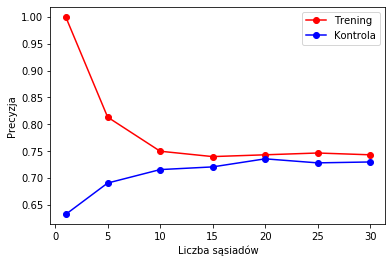

In [38]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline

numNeighbors = [1, 5, 10, 15, 20, 25, 30]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    trainAcc.append(accuracy_score(Y_train, Y_predTrain))
    testAcc.append(accuracy_score(Y_test, Y_predTest))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bo-')
plt.legend(['Trening','Kontrola'])
plt.xlabel('Liczba sąsiadów')
plt.ylabel('Precyzja')

Klasyfikacja z wykorzystaniem algorytmu KNN zaimplementowanego w pakiecie sklearn wykonana została na tych samych danych, co poprzednio, z wykorzystaniem drzew decyzyjnych. Widać tutaj, że nie występuje problem przeuczenia - oczywiście, w pewnym momencie tracimy na ogólności. Jednak wykres pokazuje znacznie lepsze efekty uczenia - pomimo, że spada precyzja treningu, co bezpośrenio pociąga za sobą wzrost błędu treningowego, to rośnie precyzja klasyfikacji na zbiorze testowym, tym samym zmniejsza się błąd klasyfikacji elementów ze zbioru kontrolnego.

Sytuacja ta jest łatwa do wyjaśnienia - dane skonstruowane zosstały tak, że nie odpowioadały one prostemu modelowi liniowemu, a więc nieliniowy model KNN wypadł w tym przypadku lepiej.

## Klasyfikatory liniowe

Zadaniem klasyfikatorów liniowych jest podział całej przestrzeni na obszary odpowiadające klasom (dwie lub więcej klas). Klasyfikatory są najprostszymi możlwiymi klasyfikatorami.Są one szeroko stosowane w przypadku, gdy celem analizy danych jest "postawienie kreski" pomiędzy danymi w taki sposób, aby podział jednoznacznie (oczwyiście w najlepszym przypadku) prowadził do zaliczenia danych do odpowiedniej klasy. W przypadku przestrzeni 2D sprawa jest oczywista - naszym zadaniem będzie znalezienie prostej, która jest w stanie podzielić dane na przynajmniej dwie grupy. W ogólnej sytucaji - będziemy starali się znaleźć hiperpłaszczyznę, która dzieli dane na dwie grupy. Wspomniana prosta lub w ogólności hiperpłaszczyzna będzie nazywana funkcją decyzyjną.

Oczywiście w przypadku rzeczywistych danych nie zawsze możliwe jest jednoznaczne skonstruowanie takiej funkcji, a wynikowa funkcja decyzyjna będzie skonstruowana tak, aby zminimalizować liczbę popełnianych błędów.

Jedną z metod klasyfikacji liniowej jest omawiana wcześniej regresja liniowa, w której zależy nam, aby zmaksymalizować odległość prostej, która przechodzi pomiędzy grupami punktów od tych punktów - dzięki temu znajdować będziemy funkcję dzielącą zbiór danych na dwa podzbiory.

Na tych zajęciach poznamy dwa podstawowe klasyfikatory liniowe - regresję liniową i SVM. Inne metody omawiane będą w ramach zajęć z sieci neuronowych i uczenia maszynowego.

### Regresja logistyczna

Regresja logistyczna stosowana jest w przypadku, gdy zmienna może przyjąć dwie wartości. Opiera się ona na charakterystycznym sposobie określania prawdopodobieństwa - szansie. Zamiast określać prawdopodobieństwo za pomocą stosunku liczby sukcesów do liczby wszytskich prób, oblicza się tutaj stosunek prawdopodobieństwa sukcesu do prawdopodobieństwa porażki. Modelem jest więc prawdopodobieństwo w następującej postaci:

$$ P(y=1|x) = \frac{1}{1+ \exp{-a^Tx-b}} = \sigma(a^Tx+b), $$

gdzie: $a$ i $b$ są parametrami modelu, których wartości estymowane są poprzez funkcję w postaci:

$$(a, b) = arg\ min_{a,b} - \sum_{i=1}^{N} y_i \log[\sigma(a^Tx_i+b)] + (1-y_i) \log [\sigma (-a^Tx_i-b)] + \frac{1}{C}\Omega([a, b]), $$

gdzie: $C$ jest parametrem kontrolujuącym odwrotność złożenia modelu (małe wartości $C$ powodują silną regularyzację), a funkcja $\Omega()$ jest parametrem regularyzacyjnym. W przypadku korzystania z biblioteki sklearn, będzie to norma $l_2$.  

Text(0, 0.5, 'Precyzja')

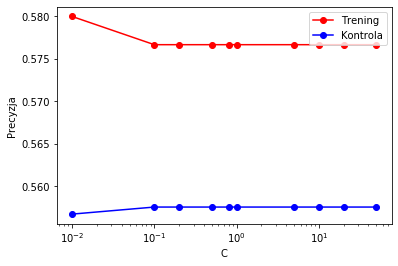

In [39]:
from sklearn import linear_model
import matplotlib.pyplot as plt

C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]
LRtrainAcc = []
LRtestAcc = []

for param in C:
    clf = linear_model.LogisticRegression(C=param)
    clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    LRtrainAcc.append(accuracy_score(Y_train, Y_predTrain))
    LRtestAcc.append(accuracy_score(Y_test, Y_predTest))
    
plt.plot(C, LRtrainAcc, 'ro-', C, LRtestAcc,'bo-')
plt.legend(['Trening','Kontrola'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Precyzja')

### Liniowa maszyna wektorów nośnych (Linear SVM)

Jest to klasyfikator liniowy, którego zadaniem jest wyznaczenie hiperpłaszczyzny, która rozdziela dane należące do dwóch klas z jak największym marginesem. 

Formalnie liniowy SVM polega na rozwiązaniu problemu minimalizacyjnego w następującej postaci:

$$ min_{a, b, \xi} \frac{||a||^2}{2} + \frac{1}{C} \sum_{i} \xi_{i},$$

gdzie:

$$ y_i \left[ a^T\phi(x_i) + b\right] \ge 1 - \xi_i \ \text{oraz} \ \xi_{i} \ge 0. $$

Text(0, 0.5, 'Precyzja')

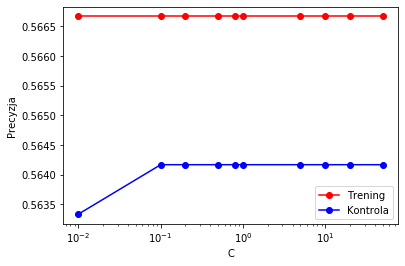

In [43]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt

C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]

SVMtrainAcc = []
SVMtestAcc = []

for param in C:
    clf = SVC(C=param,kernel='linear')
    clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    SVMtrainAcc.append(accuracy_score(Y_train, Y_predTrain))
    SVMtestAcc.append(accuracy_score(Y_test, Y_predTest))

plt.plot(C, SVMtrainAcc, 'ro-', C, SVMtestAcc,'bo-')
plt.legend(['Trening','Kontrola'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Precyzja')

W obu powyższych przypadkach widać na prawdę złe zachowanie klasyfikatorów liniowych. Wynika to oczywiście z charakterystyki zbioru danych, który w żaden sposób nie chce dać się klasyfikować metodami liniowymi.

## Nieliniowa maszyna wektorów nośnych

Skoro stwierdziliśmy, że problem z klasyfikatorem leży po stronie modelu - skorzystajmy z tej samej metody, ale zamiast wykorzystywać hiperpłaszczyznę - skorzystajmy z Gaussowskich radialnych funkcji bazowych.

Formalizm matematyczny jest tożsamy z tym z liniowej maszyny wektorów nośnych, ale dane klasyfikowane są z wykorzystaniem radialnych funkcji bazowych w postaci:

$$ y(x) = \sum_{i-1}^N \omega_i \rho(||x - x_i||),$$

gdzie $\rho(r) = \exp{(- \beta r^2)}$, $\omega_i$ to współczynnik wagowy  $i-tego$ argumentu, $\beta$ jest parametrem rozmycia pozwalającym na uniknięcie złego uwarunkowania lub osobliwości w powstałym układzie równań, a $r$ - odległości punktów środkowych funkcji aproksymacyjnych od danych. 

Oczywiście funcje gaussowskie to nie jedyne funkcje radialne, ale w przypadku rozwiązywania problemów klasyfikacyjnych - bardzo często stosowane.

Text(0, 0.5, 'Precyzja')

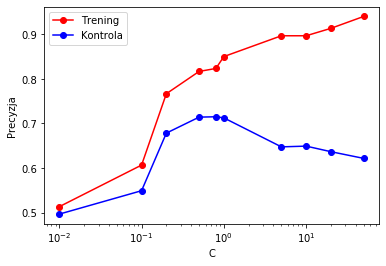

In [44]:
from sklearn.svm import SVC

C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]
SVMtrainAcc = []
SVMtestAcc = []

for param in C:
    clf = SVC(C=param,kernel='rbf',gamma='auto')
    clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    SVMtrainAcc.append(accuracy_score(Y_train, Y_predTrain))
    SVMtestAcc.append(accuracy_score(Y_test, Y_predTest))

plt.plot(C, SVMtrainAcc, 'ro-', C, SVMtestAcc,'bo-')
plt.legend(['Trening','Kontrola'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Precyzja')

Jak widać - metoda ta jest całkiem dobrym rozwiązaniem. Wynika to oczywiście z faktu, że wygenerowaliśmy nasze dane za pomocą rozkładu Gaussa i na niego nałożyliśmy póżniej część punktów z rozkładu równomiernego.

Ciekawy jest również fat, że do pewnego momentu - wraz z rosnącą precyzją uczenia, rośnie również prezcyzja klasyfikacji na zbiorze kontrolnym. Przy niepoprawnym parametrze $C$ mamy do czynienia z przeszacowaniem modelu.

## Metody grupowania (ensemble methods)

Metody grupowania to jedna z technik uczenia maszynowego, która łączy kilka modeli w jeden, w celu stworzenia optymalnego modelu predykcyjnego. Metody te można podzielić na dwe główne grupy:

1. sekwencyjne - zbiory uczące generowane są sekwencyjnie i wykorzystywane są zależności pomiędzy nimi, dzięki czemu manipulując wagami można ustalić, który zbiór ma większy wpływ na proces uczenia
2. równoległe - zbiory uczące są generowane równolegle, dzięki czemu można zmniejszyć błąd związany z uczeniem poprzez uśrednianie

W ramach zajęć zobaczymy, jak działają metody: agregacja bootstrap (bagging), losowe lasy (random forests) i wzmocnienie (boosting). Oczywiście nie są to jedyne metody grupowania, ale są one najczęściej wykorzystywane w zagadnieniach związanych z klasyfikacją.

Bagging wykorzystuje fakt, iż możliwe jest budowanie losowych zbiorów treningowych z wymianą z całego zbioru treningowego, dzięki czemu każdy podzbiór danych treningowych wykorzystywany jest do uczenia innego klasyfikatora tego samego typu. Klasyfikatory są następnie łączone. Nakładanie się zbyt dużych części zbiorów treningowych na siebie można zniwelować poprzez nielosowe wybieranie podzbiorów zboiru uczącego lub użycie słabych klasyfikatorów.

Losowe lasy to zbiory drzew decyzyjnych, które wykorzystują w swoim działaniu mechanizm baggingu - przez to tworzone jest dużo drzew (czasami nawet setki czy tysiące) i na ich podstawie ustala się najlepszy model dla każdego zestawu danych. Mechanizm ten zakłada, że na koniec wybrany zostanie najlepszy model z ze zbioru wszystkich ustalonych, co w przypadku mnieszej wariancji pozwala na wybór bardzo optymalnego modelu.

Wzmocnienie jest bardzo podobne do baggingu, ale wybór podzbiorów uczących jest stratyfikowany w celu dostarczenia optymalnych danych treningowych. Dzięki temu każda iteracja wzmocnienia tworzy trzy słabe klasyfikatory o skuteczności ok. 50%, ale za to bardzo proste, z których póżniej można zbudować optymalny klasyfikator wynikowy.

Przyjmy się tym trzem metodom grupowania zaimplementowanym w bibliotekę sklearn.

Ogarniczymy się do 500 klasyfikatorów dla przestrzeni 2D. Za najgłębszy poziom zagłębienia drzewa decyzyjnego przyjmiemy 10.

Text(0.5, 1.0, 'Kontrola')

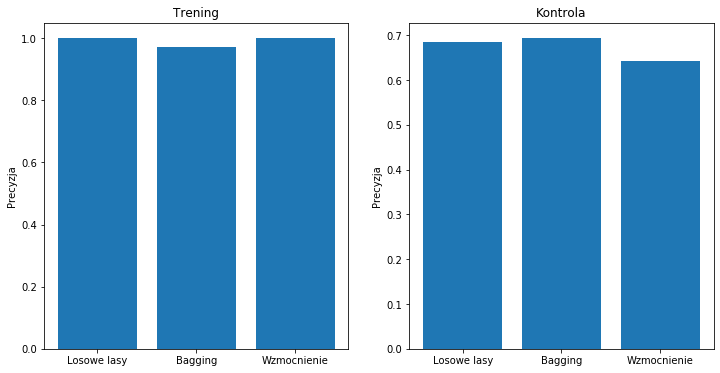

In [48]:
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier

numBaseClassifiers = 500
maxdepth = 10
trainAcc = []
testAcc = []

clf = ensemble.RandomForestClassifier(n_estimators=numBaseClassifiers)
clf.fit(X_train, Y_train)
Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)
trainAcc.append(accuracy_score(Y_train, Y_predTrain))
testAcc.append(accuracy_score(Y_test, Y_predTest))

clf = ensemble.BaggingClassifier(DecisionTreeClassifier(max_depth=maxdepth),n_estimators=numBaseClassifiers)
clf.fit(X_train, Y_train)
Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)
trainAcc.append(accuracy_score(Y_train, Y_predTrain))
testAcc.append(accuracy_score(Y_test, Y_predTest))

clf = ensemble.AdaBoostClassifier(DecisionTreeClassifier(max_depth=maxdepth),n_estimators=numBaseClassifiers)
clf.fit(X_train, Y_train)
Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)
trainAcc.append(accuracy_score(Y_train, Y_predTrain))
testAcc.append(accuracy_score(Y_test, Y_predTest))

methods = ['Losowe lasy', 'Bagging', 'Wzmocnienie']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.bar([1.5,2.5,3.5], trainAcc)
ax1.set_xticks([1.5,2.5,3.5])
ax1.set_xticklabels(methods)
ax1.set_ylabel("Precyzja")
ax1.set_title("Trening")
ax2.bar([1.5,2.5,3.5], testAcc)
ax2.set_xticks([1.5,2.5,3.5])
ax2.set_xticklabels(methods)
ax2.set_ylabel("Precyzja")
ax2.set_title("Kontrola")

Jak widać - metody te, pomimo swojego skomplikowania wynikającego z wielokrotnego procesu uczenia, dają świetne rezultaty - prezyzja uczenia jest bliska jedności, a testy klasyfikacji na zbiorze kontrolnym dają rezultaty z precyzją ok. 70%. Pamiętać należy, że w tym przypadku nie zakładaliśmy żadnego modelu, jak miało to miejsce w przypadku innych klasyfikatorów. Podobne rezulaty otrzymaliśmy w przypadkach, gdzie albo założyliśmy dobry model (gaussowski) albo "ręcznie" kontrolowaliśmy poziom zagłębienia drzew decyzyjnych.

## Zadanie

Przetestuj poznane metody klasyfikacji na zbiorze IRIS, który już dobrze znasz. Na samym końcu - oceń wyniki i skomentuj krótko, która metoda kalsyfikacji i dlaczego przyniosła najlepsze rezultaty.

Uwaga! Nie spodziewaj się świetnych wyników - pamiętaj, że zbiór ten nie jest syntetyczny i zawiera dane, które mogą być ciężkie do klasyfikacji. Postaraj się nie usuwać danych ze zbioru, chyba, że uda Ci się odkryć, które punkty psują klasyfikację. Natomiast jeśli usuniesz dane - wyraźnie zaznacz, które punkty usunąłeś i dlaczego.

